In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy


%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


<ipython-input-46-232b3e029781>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_start['sentiment'], palette='viridis')


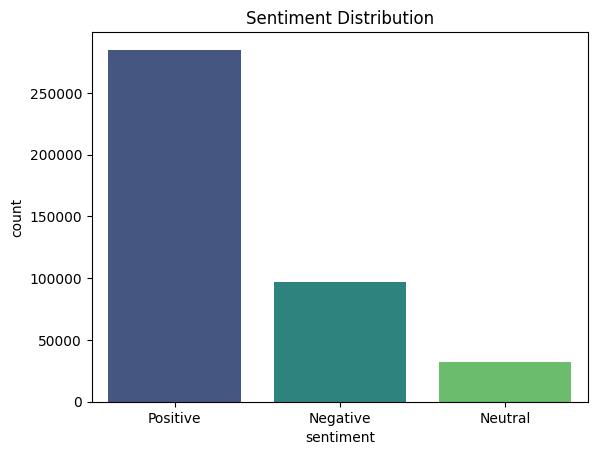

In [46]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# connection to google Drive
drive.mount('/content/drive')

# path to google Drive
file_path = '/content/drive/My Drive/Amazon_Unlocked_Mobile.csv'  # שנה בהתאם למיקום הקובץ

# load the data
df_start = pd.read_csv(file_path)

# Display the first five lines for initial testing
df_start.head()

# Checking which columns exist
df_start.info()

# Checking whether there are missing values
df_start.isnull().sum()

# Keeping only the relevant columns
df_start = df_start[['Reviews', 'Rating']].dropna()

# Convert ratings to emotion categories
def classify_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Creating an emotion column
df_start['sentiment'] = df_start['Rating'].apply(classify_sentiment)

# Showing the distribution of emotions
sns.countplot(x=df_start['sentiment'], palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [47]:
# Selecting a subset of 6,000 reviews at random
#df_sample = df.sample(n=6000, random_state=42)

# Balanced sampling
# The desired number of samples from each category
n_per_class = 2000

# A balanced sample from each category
df = df_start.groupby('sentiment').apply(lambda x: x.sample(n=n_per_class, random_state=42)).reset_index(drop=True)

# Saving the filtered file
filtered_file = "/content/drive/My Drive/filtered_amazon_reviews.csv"
df.to_csv(filtered_file, index=False)
print(f"save the filtered file: {filtered_file}")

save the filtered file: /content/drive/My Drive/filtered_amazon_reviews.csv


<ipython-input-47-7619ce771853>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df_start.groupby('sentiment').apply(lambda x: x.sample(n=n_per_class, random_state=42)).reset_index(drop=True)


In [48]:
df = pd.read_csv('/content/drive/My Drive/filtered_amazon_reviews.csv')

<ipython-input-49-3b583bb963aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


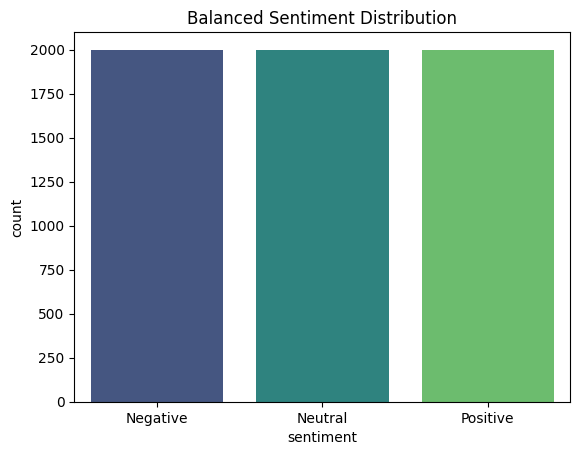

In [49]:
# Presentation of distribution after the balanced sample
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title('Balanced Sentiment Distribution')
plt.show()

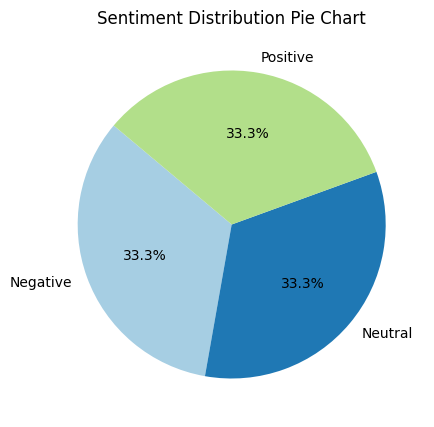

In [50]:
sentiment_counts = df['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(sentiment_counts))))

# Add title
plt.title('Sentiment Distribution Pie Chart')

# Show the plot
plt.show()

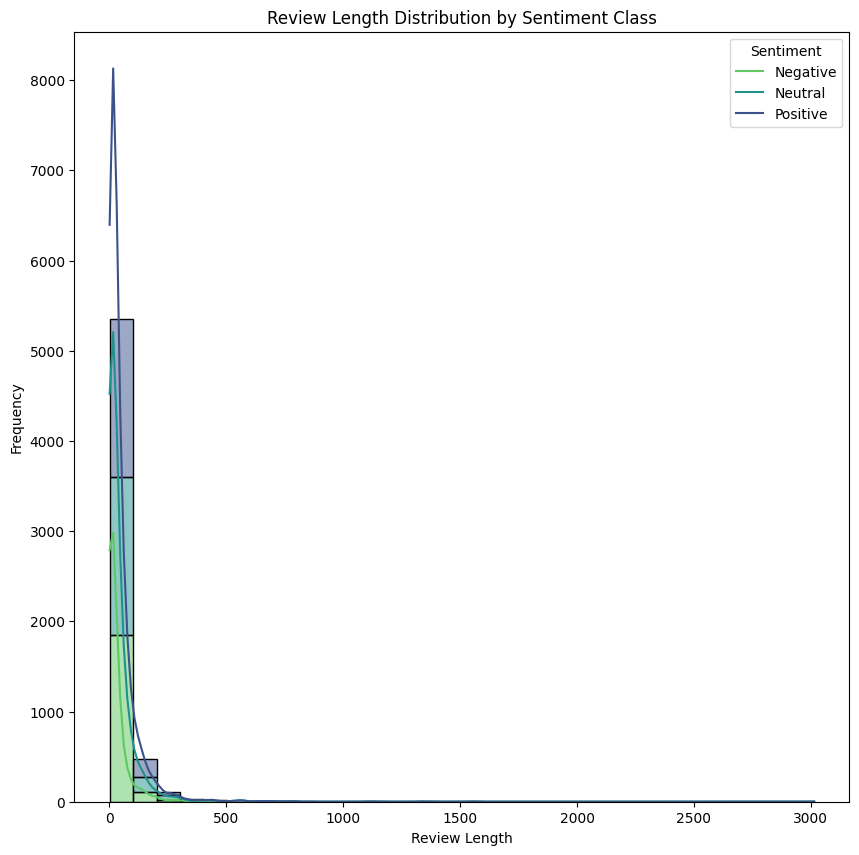

In [51]:
df['Review_length'] = df['Reviews'].apply(lambda x: len(x.split()))

# Plot sentence length distribution using Seaborn
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='Review_length', hue='sentiment', multiple='stack', bins=30, kde=True, palette='viridis')
plt.title('Review Length Distribution by Sentiment Class')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.show()

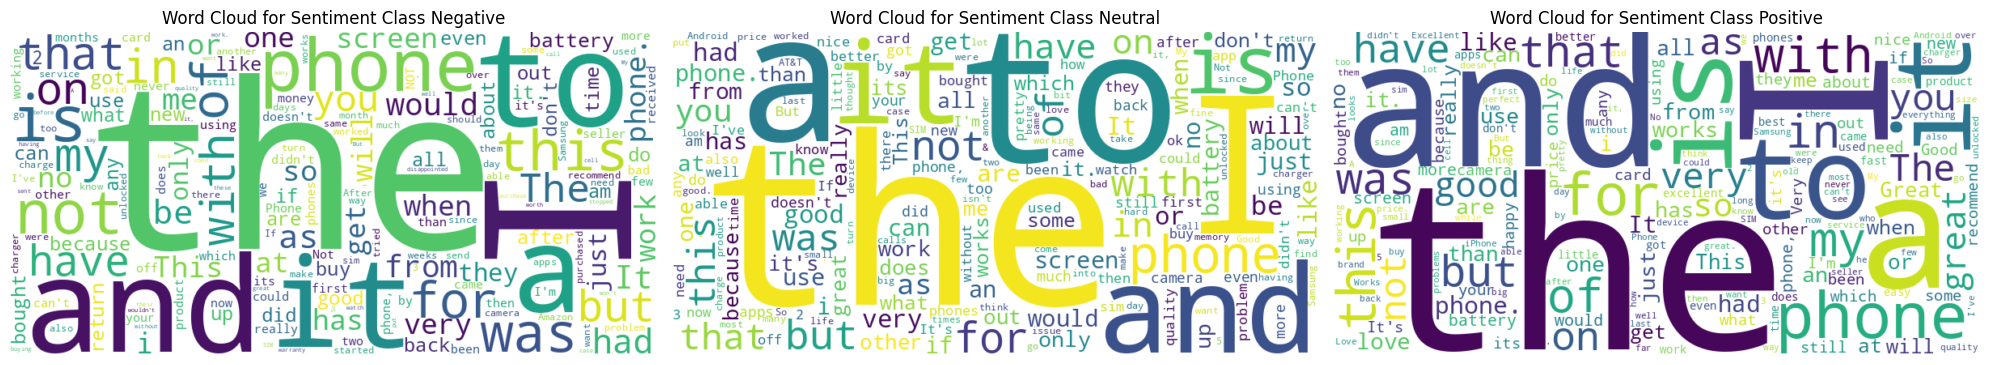

In [52]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

def plot_wordcloud(data, ax, title):
    wordcloud = WordCloud(stopwords=set(WordCloud().stopwords), width=800, height=400, background_color='white').generate_from_frequencies(data)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Create subplots
fig, axes = plt.subplots(1, len(df['sentiment'].unique()), figsize=(20, 5))

# Generate word clouds for each sentiment class
for ax, label in zip(axes, df['sentiment'].unique()):
    words = ' '.join(df[df['sentiment'] == label]['Reviews']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, ax, f'Word Cloud for Sentiment Class {label}')

plt.tight_layout()
plt.show()

In [53]:
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
df

,Reviews,Rating,sentiment,Review_length
0,"Don't buy!!! It is a fake, Verified by a verif...",1,-1,13
1,not worth it.. This phone just completely shut...,1,-1,27
2,"When I received it, it didn't come with SIM ca...",1,-1,53
3,"Battery Life very low, not as user friendly as...",1,-1,27
4,It took me few days to connect internet. I ret...,1,-1,26
...,...,...,...,...
5995,Love it...,5,1,2
5996,"Good product, I like it as expected. Thank you...",5,1,11
5997,"Bought a used phone, still in OK shape, the th...",4,1,26
5998,Great product for the price. I bought it for m...,5,1,18


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and target variable
X = df['Reviews']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer with stop words, max features, and n-grams
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))

# Fit on training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)

# ***Training the models***

**knn**

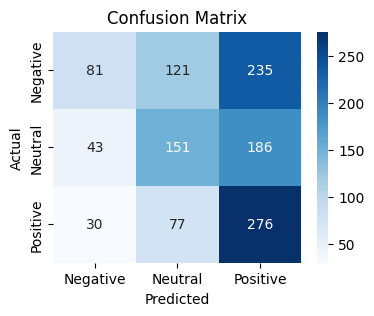

Accuracy: 0.42333333333333334
Classification Report:
               precision    recall  f1-score   support

          -1       0.53      0.19      0.27       437
           0       0.43      0.40      0.41       380
           1       0.40      0.72      0.51       383

    accuracy                           0.42      1200
   macro avg       0.45      0.43      0.40      1200
weighted avg       0.45      0.42      0.39      1200



In [55]:
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Decision Tree Classification**

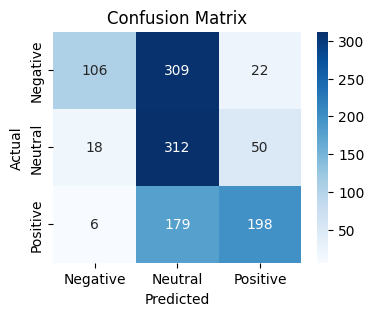

Accuracy: 0.5133333333333333
Classification Report:
               precision    recall  f1-score   support

          -1       0.82      0.24      0.37       437
           0       0.39      0.82      0.53       380
           1       0.73      0.52      0.61       383

    accuracy                           0.51      1200
   macro avg       0.65      0.53      0.50      1200
weighted avg       0.65      0.51      0.50      1200



In [56]:
# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5)

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**SVM**

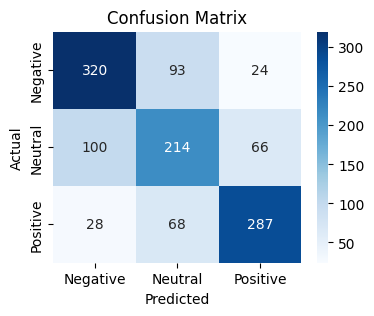

Accuracy: 0.6841666666666667
Classification Report:
               precision    recall  f1-score   support

          -1       0.71      0.73      0.72       437
           0       0.57      0.56      0.57       380
           1       0.76      0.75      0.76       383

    accuracy                           0.68      1200
   macro avg       0.68      0.68      0.68      1200
weighted avg       0.68      0.68      0.68      1200



In [57]:
# Initialize SVM classifier
clf = SVC(kernel='linear', C=1.0)

# Fit the classifier on the training data
clf.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

**Logistic** **Regression**

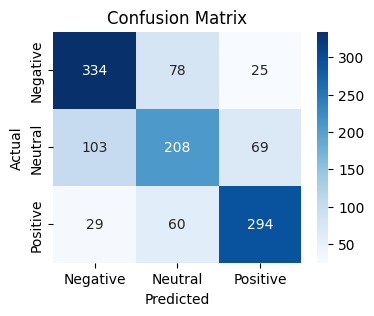

Accuracy: 0.6966666666666667
Classification Report:
               precision    recall  f1-score   support

          -1       0.72      0.76      0.74       437
           0       0.60      0.55      0.57       380
           1       0.76      0.77      0.76       383

    accuracy                           0.70      1200
   macro avg       0.69      0.69      0.69      1200
weighted avg       0.69      0.70      0.69      1200



In [58]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression(solver='liblinear', C=1.0)

# Fit the classifier on the training data
log_reg.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_transformed)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


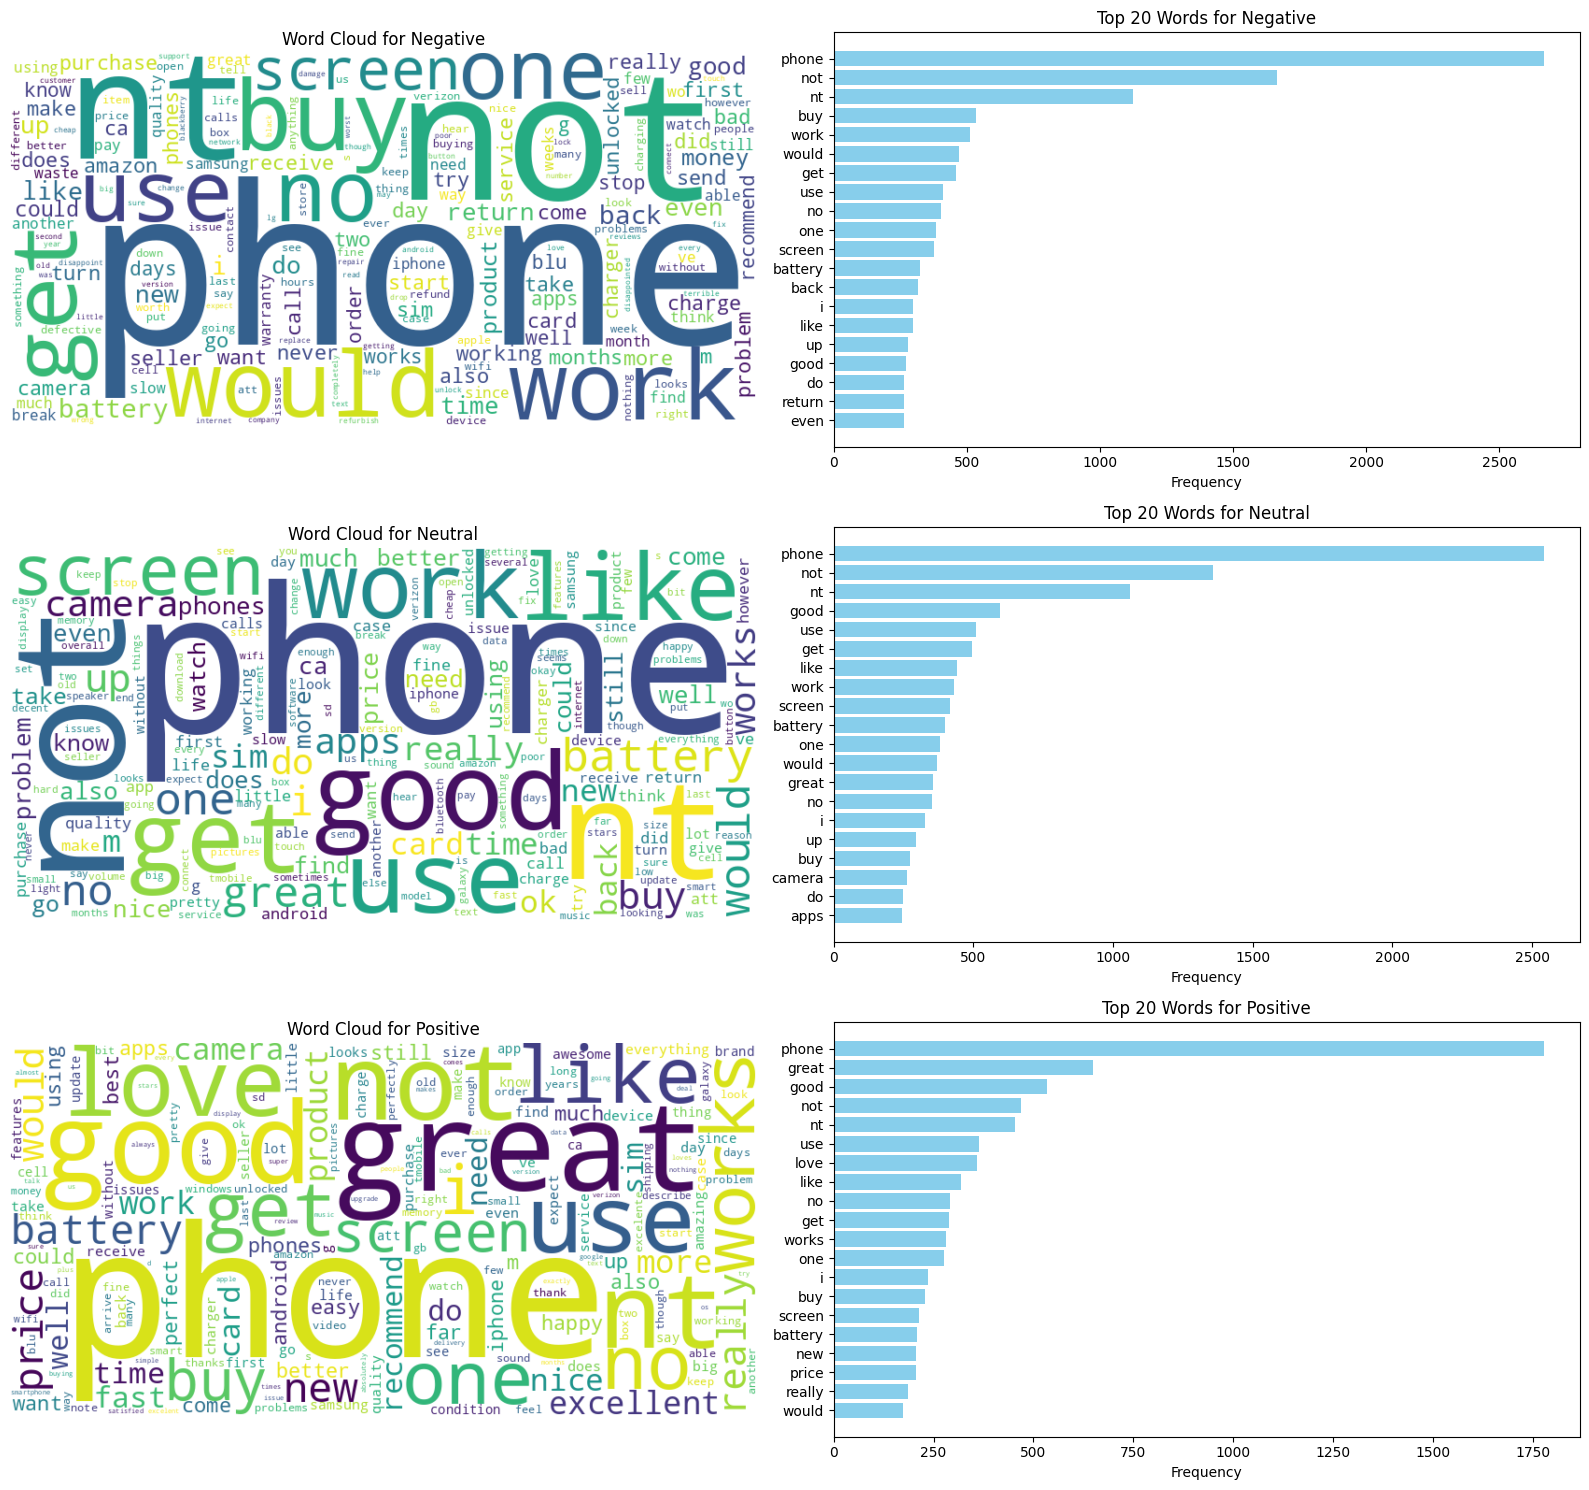

In [59]:
# Download NLTK resources
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


# Define stopwords and additional irrelevant words
exclude_words = {"up", "down", "few", "more", "no", "nor", "not"}
stop_words = set(stopwords.words('english')).union({"said", "EU", "mn", '$', '%', "eur", "finnish", "finland", '(', ')'})
stop_words -= exclude_words

def remove_stopwords(sentence):
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

def remove_irrelevants(sentence):
    # Remove URLs
    sentence = re.compile(r'https?://\S+|www\.\S+').sub('', sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove non-alphabetic characters (optional)
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    return sentence

def preprocess_sentence(sentence):
    if isinstance(sentence, str):  # Only process strings
        sentence = remove_irrelevants(sentence)
        sentence = remove_stopwords(sentence)
        sentence = convert_past_to_present(sentence)  # Convert verbs to present tense
    return sentence

    # Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def convert_past_to_present(sentence):
    doc = nlp(sentence)
    present_sentence = []

    for token in doc:
        if token.pos_ == 'VERB':
            # Get the lemma (base form of the verb) which often is the present tense form
            lemma = token.lemma_
            if token.tag_ in ['VBD', 'VBN']:  # Past tense and past participle tags
                present_sentence.append(lemma)
            else:
                present_sentence.append(token.text)
        else:
            present_sentence.append(token.text)

    return " ".join(present_sentence)

# Assuming df is your DataFrame and it contains 'Sentence' and 'Sentiment' columns
df['Reviews'] = df['Reviews'].astype(str).apply(preprocess_sentence)

# Function to plot word cloud (you need to have wordcloud and matplotlib installed)
def plot_wordcloud(word_freq, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

# Function to plot top 20 words bar chart
def plot_top_words(word_freq, title, ax):
    top_words = word_freq.most_common(20)
    words, counts = zip(*top_words)
    ax.barh(words, counts, color='skyblue')
    ax.set_xlabel('Frequency')
    ax.set_title(title)
    ax.invert_yaxis()  # Invert y-axis to have the most frequent words on top

# Number of unique sentiments
unique_labels = df['sentiment'].unique()
num_labels = len(unique_labels)

# Create subplots: 2 columns (word clouds and bar charts) and as many rows as unique labels
fig, axes = plt.subplots(nrows=num_labels, ncols=2, figsize=(16, 5 * num_labels))

# Map sentiment numbers to labels
sentiment_labels = {-1: "Negative", 0: "Neutral", 1: "Positive"}

for idx, label in enumerate(unique_labels):
    label_text = sentiment_labels.get(label, label)  # Convert number to text
    words = ' '.join(df[df['sentiment'] == label]['Reviews']).split()
    word_freq = Counter(words)
    plot_wordcloud(word_freq, f'Word Cloud for {label_text}', axes[idx, 0])
    plot_top_words(word_freq, f'Top 20 Words for {label_text}', axes[idx, 1])

plt.tight_layout()
plt.show()

In [60]:
# Ensure Rating is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Update sentiment values based on Rating
df['sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else (-1 if x < 3 else 0))

df

,Reviews,Rating,sentiment,Review_length
0,do nt buy fake verified verify apple tech,1,-1,13
1,not worth phone completely shut lose family me...,1,-1,27
2,receive did nt come sim card speaker phone did...,1,-1,53
3,battery life low not user friendly slow do nt ...,1,-1,27
4,take few days connect internet return product ...,1,-1,26
...,...,...,...,...
5995,love,5,1,2
5996,good product like expect thank much,5,1,11
5997,buy use phone still ok shape thing like tough ...,4,1,26
5998,great product price buy friend really happy,5,1,18


# ***GridSearchCV***

**knn**

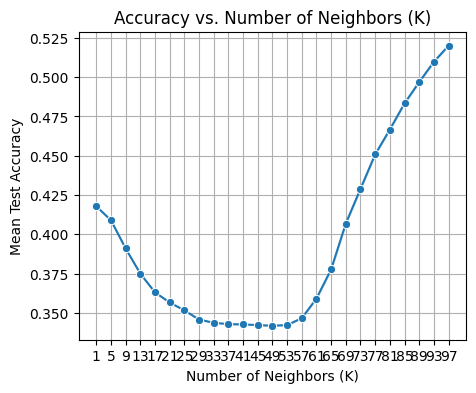

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Features and target variable
X = df['Reviews']  # לוקחים את הביקורות אחרי הניקוי
y = df['sentiment']  # תוויות הרגש

# מחלקים את הדאטה לסט אימון וסט בדיקה (80% אימון, 20% בדיקה)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2))

# התאמת ה-TF-IDF על סט האימון בלבד
X_train_transformed = vectorizer.fit_transform(X_train)

# המרת סט הבדיקה לפי אותו וקטוריזר (בלי fit מחדש!)
X_test_transformed = vectorizer.transform(X_test)


# Define the parameter grid for GridSearchCV with n_neighbors up to 100 in steps of 4
param_grid = {
    'n_neighbors': list(range(1, 101, 4)),  # Testing from 1 to 100 in steps of 4
    'algorithm': ['auto','brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
param_n_neighbors = results['param_n_neighbors']

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract results for plotting
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
# Plot accuracy vs. n_neighbors
plt.figure(figsize=(5, 4))
sns.lineplot(x=param_n_neighbors, y=mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.xticks(np.arange(min(param_n_neighbors), max(param_n_neighbors)+1, 4))  # Set x-ticks to match steps
plt.show()

✅ Best K: 97
✅ Best Algorithm: auto

📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.76      0.24      0.37       437
           0       0.68      0.14      0.23       380
           1       0.38      0.98      0.55       383

    accuracy                           0.45      1200
   macro avg       0.61      0.45      0.38      1200
weighted avg       0.61      0.45      0.38      1200



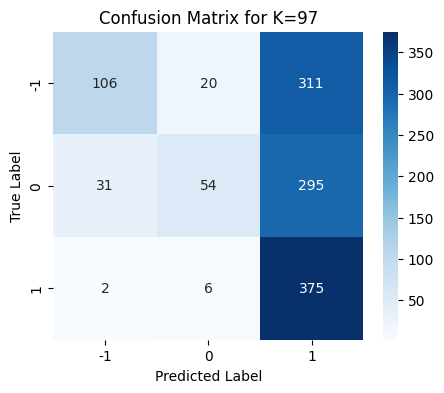

                                                Reviews
1048                              phone not work return
821   unlocked does nt work carrier right sim card e...
5153  excellent phone exceed expections one main con...
4141           pleased wish could afford larger storage
5205  gift friend really happy phone upgrade blu lif...
(4800, 5000)
<class 'scipy.sparse._csr.csr_matrix'>


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# שליפת ה-K האופטימלי שמצאנו ב-GridSearchCV
best_k = grid_search.best_params_['n_neighbors']
best_algorithm = grid_search.best_params_['algorithm']

print(f"✅ Best K: {best_k}")
print(f"✅ Best Algorithm: {best_algorithm}")

# אימון מודל KNN עם ה-K שנמצא כטוב ביותר
best_knn = KNeighborsClassifier(n_neighbors=best_k, algorithm=best_algorithm)
best_knn.fit(X_train_transformed, y_train)

# חיזוי התוויות על סט הבדיקה
y_pred = best_knn.predict(X_test_transformed)

# הפקת דו"ח ביצועים
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# הפקת מטריצת בלבול
conf_matrix = confusion_matrix(y_test, y_pred)

# הצגת מטריצת הבלבול
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for K={best_k}')
plt.show()

print(df[['Reviews']].sample(5))
print(X_train_transformed.shape)
print(type(X_train_transformed))

Best Parameters: 43, auto
Best Cross-Validation Accuracy: 0.3425


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       437
           0       0.57      0.02      0.04       380
           1       0.32      0.99      0.48       383

    accuracy                           0.32      1200
   macro avg       0.30      0.34      0.17      1200
weighted avg       0.28      0.32      0.17      1200



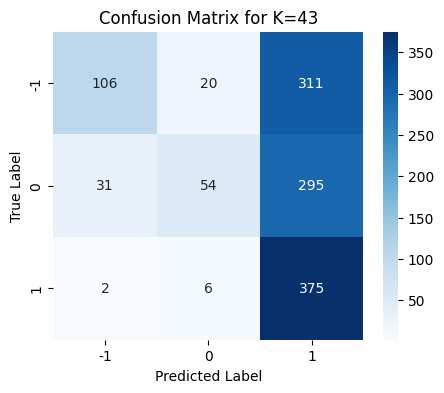

In [63]:
param_grid = {
    'n_neighbors': [43, 45, 47],  # Range of K values to test
    'algorithm': ['auto','brute']  # Different algorithms to test
}

# Initialize GridSearchCV with KNN model and parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best K value and the corresponding accuracy
best_k = grid_search.best_params_['n_neighbors']
best_algorithm = grid_search.best_params_['algorithm']
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_k}, {best_algorithm}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Evaluate the best model on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(X_test_transformed)

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Confusion Matrix for K={best_k}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Decision Tree Classifier**

Best Parameters: {'max_depth': 65, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 65}
Cross-validation results saved to cross_validation_results.csv
Accuracy: 0.5783
Classification Report:
               precision    recall  f1-score   support

          -1       0.66      0.52      0.58       437
           0       0.45      0.61      0.52       380
           1       0.68      0.61      0.64       383

    accuracy                           0.58      1200
   macro avg       0.60      0.58      0.58      1200
weighted avg       0.60      0.58      0.58      1200



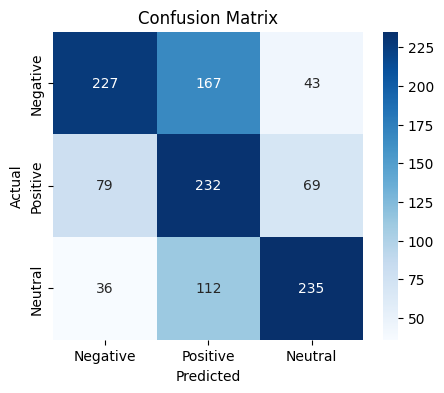

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


clf = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [60, 65, 70, 75, 80],
    'min_samples_split': [60, 65, 70, 75, 80],
    'min_samples_leaf': [1, 2, 5, 7],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Print the parameters of the best estimator
print("Best Parameters:", grid_search.best_params_)

# Perform cross-validation with the best estimator
cv_results = cross_val_score(best_clf, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Collect cross-validation results
cv_data = {
    'Fold': range(1, len(cv_results) + 1),
    'Accuracy': cv_results
}

# Convert to DataFrame
df_cv_results = pd.DataFrame(cv_data)

# Save to CSV
df_cv_results.to_csv('cross_validation_results.csv', index=False)
print("Cross-validation results saved to cross_validation_results.csv")

# Make predictions on the test data
y_pred = best_clf.predict(X_test_transformed)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Plot confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**svm**

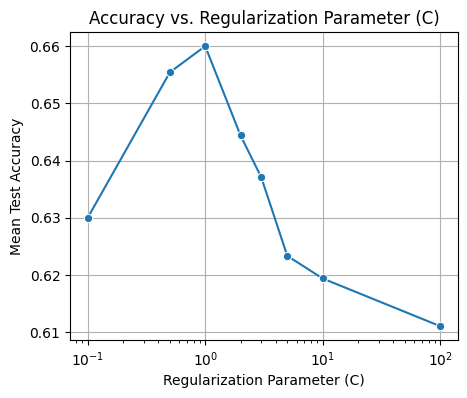

              precision    recall  f1-score   support

          -1       0.73      0.74      0.73       437
           0       0.56      0.56      0.56       380
           1       0.75      0.73      0.74       383

    accuracy                           0.68      1200
   macro avg       0.68      0.68      0.68      1200
weighted avg       0.68      0.68      0.68      1200



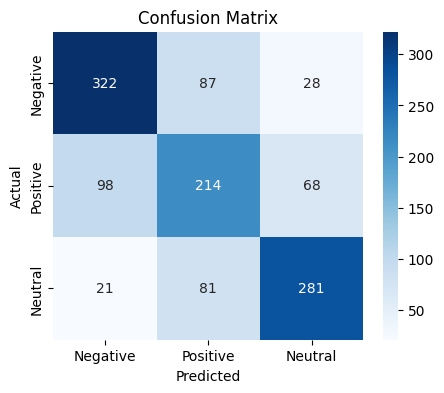

In [65]:
param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 5, 10, 100],  # Regularization parameter
    'kernel': ['linear']  # Kernel type to use
}

# Initialize GridSearchCV with SVM model and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Extract the results into a DataFrame
results = grid_search.cv_results_

# Plot accuracy vs. regularization parameter (C)
plt.figure(figsize=(5, 4))
sns.lineplot(x=results['param_C'], y=results['mean_test_score'], marker='o')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.grid(True)
plt.show()

# Get the best estimator and evaluate it
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_transformed)
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Logistic Regression**

✅ Best Parameters: {'C': 2, 'max_iter': 100}
✅ Best Cross-Validation Accuracy: 0.6650

📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.73      0.73       437
           0       0.57      0.56      0.56       380
           1       0.75      0.76      0.75       383

    accuracy                           0.69      1200
   macro avg       0.68      0.68      0.68      1200
weighted avg       0.69      0.69      0.69      1200



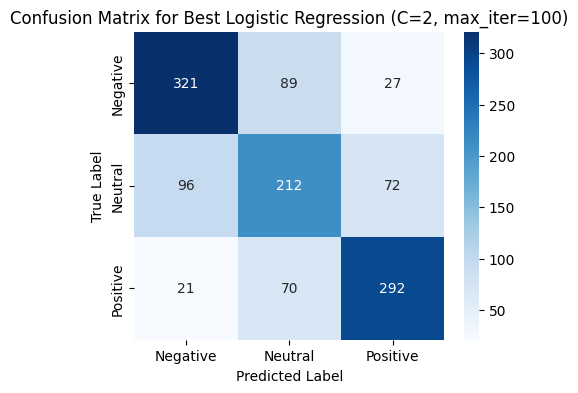

In [70]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1, 2, 5, 10, 50, 100],  # Regularization parameter
    'max_iter': [50, 100, 250, 500, 1000, 2500, 5000]
}

# Initialize GridSearchCV with Logistic Regression model and parameter grid
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"✅ Best Parameters: {best_params}")
print(f"✅ Best Cross-Validation Accuracy: {best_accuracy:.4f}")

# Train the best model on the entire training set
best_logreg_model = grid_search.best_estimator_
best_logreg_model.fit(X_train_transformed, y_train)

# Evaluate the best model on the test set
y_pred = best_logreg_model.predict(X_test_transformed)

# Print classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Best Logistic Regression (C={best_params["C"]}, max_iter={best_params["max_iter"]})')
plt.show()